In [15]:
# load_digits dataset, which is a collection of 8x8 images (64 features)of digits. The dataset contains a total of 1797 sample points.
from sklearn.datasets import load_digits
digits = load_digits()

<Figure size 432x288 with 0 Axes>

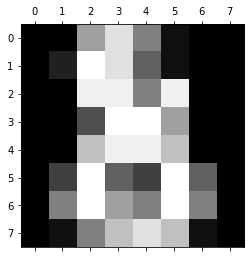

In [16]:
#visualize the  image of the handwritten digits stored in images
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[1796]) 
plt.show()


In [17]:
# retrive the label of image
digits.target[1796]

8

In [18]:
#list all of the labels
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
#Importing Relevant Libraries & Modules

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [20]:
#prepare the data for training by declaring a NumPy array data and reshaping it so that it has the first dimension equal to the length of the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [21]:
#Splitting Data into Train and Test 50% training and 50% testing data
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False)

In [22]:
#Classification Report will give us the precision, recall, f1-score, support, and accuracy
#the Confusion Matrix will show us the number of True Positives, False Positives, and False Negatives for each Classifier
# We will use the following classifiers from Sklearn:
# Support Vector Machine
# Gaussian Naive Bayes
# Decision Trees
# Random Forest
# K Nearest Neighbours
# Stochastic Gradient Descent

In [23]:
def classification_report(predicted,classifier):
  _, axes = plt.subplots(2, 4)
  images_and_labels = list(zip(digits.images, digits.target))
  for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
      ax.set_axis_off()
      ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
      ax.set_title('Training: %i' % label)
      
  images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
  for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
      ax.set_axis_off()
      ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
      ax.set_title('Prediction: %i' % prediction)
  print("\nClassification report for classifier %s:\n%s\n" % (classifier, metrics.classification_report(y_test, predicted)))
  disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
  disp.figure_.suptitle("Confusion Matrix")
  print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
  print("\nAccuracy of the Algorithm: ", classifier.score(X_test, y_test))
  plt.show()



Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 0  0 52  1  0  0  0  0  0  0]
 [ 0  0  0 47  0  2  0  0  4  0]
 [ 0  0  0  0 54  0  0  0  1  2]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


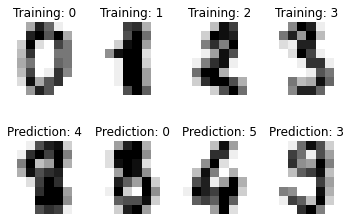

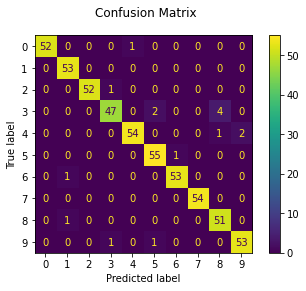

In [24]:
#1. Support Vector Machines (SVM)
from sklearn import svm
svm_classifier = svm.SVC(gamma=0.001)
svm_classifier.fit(X_train, y_train)
predicted_svm = svm_classifier.predict(X_test)
classification_report(predicted_svm,svm_classifier)



Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.65      0.79      0.71        53
           2       0.98      0.81      0.89        53
           3       0.92      0.64      0.76        53
           4       1.00      0.86      0.92        57
           5       0.83      0.93      0.87        56
           6       0.96      0.98      0.97        54
           7       0.73      0.83      0.78        54
           8       0.59      0.71      0.64        52
           9       0.82      0.73      0.77        55

    accuracy                           0.83       540
   macro avg       0.84      0.82      0.83       540
weighted avg       0.84      0.83      0.83       540



Confusion matrix:
[[51  0  0  0  0  0  0  0  2  0]
 [ 0 42  1  0  0  0  0  0  3  7]
 [ 0  5 43  1  0  0  1  0  1  2]
 [ 0  3  0 34  0  3  0  2 11  0]
 [ 1  0  0  0 49  0  0  6  1  0]
 [ 0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


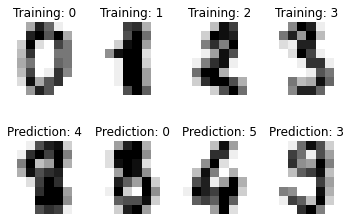

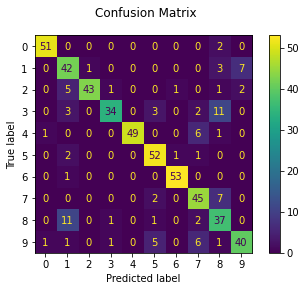

In [25]:
#2. Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, y_train)
predicted_GNB = GNB_classifier.predict(X_test)
classification_report(predicted_GNB,GNB_classifier)



Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        53
           1       0.79      0.70      0.74        53
           2       0.76      0.72      0.74        53
           3       0.88      0.68      0.77        53
           4       0.86      0.86      0.86        57
           5       0.85      0.82      0.84        56
           6       0.80      0.83      0.82        54
           7       0.88      0.98      0.93        54
           8       0.68      0.62      0.65        52
           9       0.62      0.84      0.71        55

    accuracy                           0.79       540
   macro avg       0.80      0.79      0.79       540
weighted avg       0.80      0.79      0.79       540



Confusion matrix:
[[46  0  5  0  0  0  0  0  1  1]
 [ 0 37  0  1  0  1  1  1  3  9]
 [ 2  2 38  4  0  0  3  1  2  1]
 [ 0  1  3 36  1  3  0  1  3  5]
 [ 3  0  0  0 49  0  2  2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


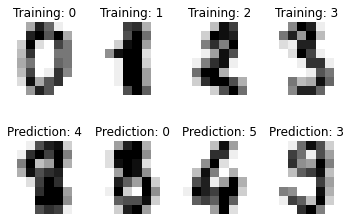

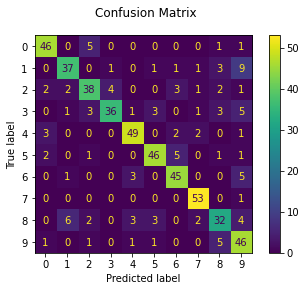

In [26]:
# 3. Decision Trees
from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
predicted_dt = dt_classifier.predict(X_test)
classification_report(predicted_dt,dt_classifier)



Classification report for classifier RandomForestClassifier(max_depth=2, random_state=0):
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        53
           1       0.73      0.66      0.69        53
           2       0.79      0.77      0.78        53
           3       0.66      0.74      0.70        53
           4       0.88      0.81      0.84        57
           5       0.88      0.79      0.83        56
           6       0.85      0.98      0.91        54
           7       0.64      1.00      0.78        54
           8       0.94      0.31      0.46        52
           9       0.79      0.80      0.79        55

    accuracy                           0.79       540
   macro avg       0.80      0.78      0.77       540
weighted avg       0.80      0.79      0.77       540



Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 1 35  1  2  2  1  0  5  0  6]
 [ 1  0 41  9  0  0  0  2  0  0]
 [ 0  1  6 39  0  2  0  4  1  0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


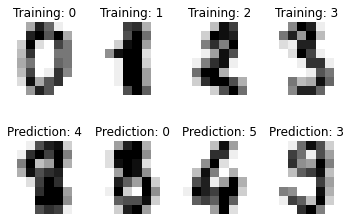

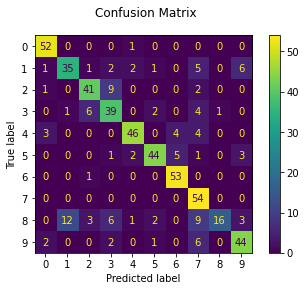

In [27]:
#4. Random Forest
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(max_depth=2, random_state=0)
RF_classifier.fit(X_train, y_train)
predicted_RF = RF_classifier.predict(X_test)
classification_report(predicted_RF,RF_classifier)


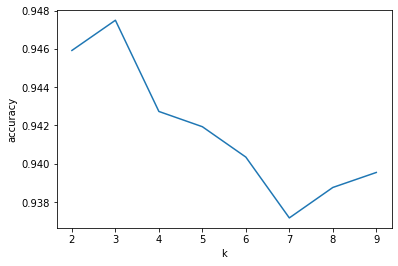

In [28]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


ks = np.arange(2, 10)
scores = []
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train, y_train, cv=5)
    score.mean()
    scores.append(score.mean())

plt.plot(ks,scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()


Classification report for classifier KNeighborsClassifier(metric='euclidean', n_neighbors=3):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.96      1.00      0.98        53
           2       1.00      0.96      0.98        53
           3       0.96      0.92      0.94        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.98      1.00      0.99        54
           8       0.94      0.96      0.95        52
           9       0.96      0.95      0.95        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 1  0 51  1  0  0  0  0  0  0]
 [ 0  0  0 49  0  1  0  1  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


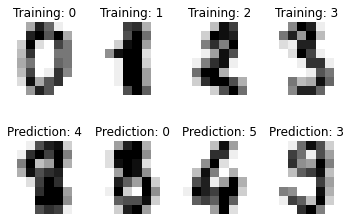

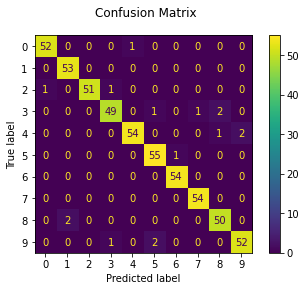

In [29]:
#5. K Nearest Neighbours (KNN)
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
KNN_classifier.fit(X_train, y_train)
predicted_KNN = KNN_classifier.predict(X_test)
classification_report(predicted_KNN,KNN_classifier)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Classification report for classifier SGDClassifier(max_iter=5):
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        53
           1       1.00      0.42      0.59        53
           2       1.00      0.92      0.96        53
           3       0.93      0.79      0.86        53
           4       0.74      0.84      0.79        57
           5       0.87      0.96      0.92        56
           6       0.78      1.00      0.88        54
           7       0.96      0.87      0.91        54
           8       0.70      0.81      0.75        52
           9       0.75      0.87      0.81        55

    accuracy                           0.84       540
   macro avg       0.86      0.84      0.84       540
weighted avg       0.86      0.84      0.84       540



Confusion matrix:
[[50  0  0  0  1  0  2  0  0  0]
 [ 0 22  0  2 11  0  4  0  4 10]
 [ 3  0 49  0  0  0  0  0  0  1]
 [ 0  0  0 42  0  4  0  2  5  0]
 [ 0  0  0  0 48  0  6  

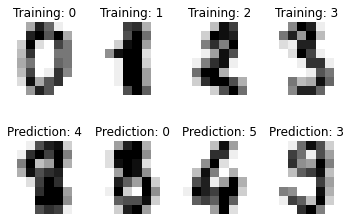

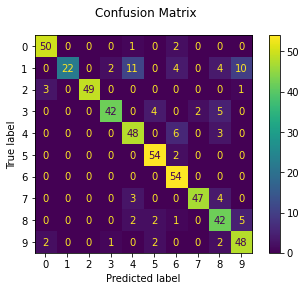

In [30]:
#6. Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd_classifier.fit(X_train, y_train)
predicted_sgd = sgd_classifier.predict(X_test)
classification_report(predicted_sgd,sgd_classifier)


In [37]:
#Image Processing
import numpy as np
from skimage import exposure
import base64
from PIL import Image, ImageOps, ImageChops
from io import BytesIO
import requests


def data_uri_to_image(uri):
    # encoded_data = uri.split(',')[1]
    # encoded_data = uri
    # image = base64.b64decode(encoded_data)
    response = requests.get(uri)
    return  Image.open(BytesIO(response.content))
    # return Image.open(BytesIO(image))

# 1. Replace a transparent background with a color
def replace_transparent_background(image):
    image_arr = np.array(image)

    if len(image_arr.shape) == 2:
        return image

    alpha1 = 0
    r2, g2, b2, alpha2 = 255, 255, 255, 255

    red, green, blue, alpha = image_arr[:, :, 0], image_arr[:, :, 1], image_arr[:, :, 2], image_arr[:, :, 3]
    mask = (alpha == alpha1)
    image_arr[:, :, :4][mask] = [r2, g2, b2, alpha2]

    return Image.fromarray(image_arr)
# 2. Trim open borders
def trim_borders(image):
    bg = Image.new(image.mode, image.size, image.getpixel((0,0)))
    diff = ImageChops.difference(image, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return image.crop(bbox)
    
    return image
# 3. Add borders of equal size
def pad_image(image):
    return ImageOps.expand(image, border=30, fill='#fff')

# 4. Convert the image to grayscale mode
def to_grayscale(image):
    return image.convert('L')

# 5. Invert colors
def invert_colors(image):
    return ImageOps.invert(image)
# 6. Resize the image to 8x8 format
def resize_image(image):
    return image.resize((8, 8), Image.LINEAR)
#7. scale down intensity
def scale_down_intensity(image):
    image_arr = np.array(image)
    image_arr = exposure.rescale_intensity(image_arr, out_range=(0, 16))
    return Image.fromarray(image_arr)

In [38]:
#image processing fun
def process_image(data_uri):
    image = data_uri_to_image(data_uri)

    is_empty = not image.getbbox()
    if is_empty:
        return None

    image = replace_transparent_background(image)
    image = trim_borders(image)
    image = pad_image(image)
    image = to_grayscale(image)
    image = invert_colors(image)
    image = resize_image(image)
    image = scale_down_intensity(image)

    return np.array([
        np.array(image).flatten()
    ])

In [39]:
 image_data_uri='https://media.istockphoto.com/vectors/number-eight-8-hand-drawn-with-dry-brush-vector-id484207302?k=6&m=484207302&s=170667a&w=0&h=s3YANDyuLS8u2so-uJbMA2uW6fYyyRkabc1a6OTq7iI='

# image_data_uri='$(curl "https://media.istockphoto.com/vectors/number-eight-8-hand-drawn-with-dry-brush-vector-id484207302?k=6&m=484207302&s=170667a&w=0&h=s3YANDyuLS8u2so-uJbMA2uW6fYyyRkabc1a6OTq7iI=" | base64)\"}" -i'
x = process_image(image_data_uri)
        
prediction = KNN_classifier.predict(x)[0]
prediction

8